In [20]:
import os
import pandas as pd

file_path = os.path.join('Dataset', 'kdd-with-columns.csv')
df = pd.read_csv(file_path)

print(f"Read {len(df)} rows from {file_path}")

df.dropna(inplace=True, axis=1)

pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)

display(df)

Read 494021 rows from Dataset\kdd-with-columns.csv


,duration,protocol_type,...,dst_host_srv_rerror_rate,outcome
0,0,tcp,...,0.0,normal.
1,0,tcp,...,0.0,normal.
...,...,...,...,...,...
494019,0,tcp,...,0.0,normal.
494020,0,tcp,...,0.0,normal.


In [21]:
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    """
    Calculates the percentage of each unique value in a pandas Series
    and returns a formatted string.
    """
    value_counts = values.value_counts()
    total_count = len(values)
    
    result_list = [
        f"{value}:{round(100 * (count / total_count), 2)}%"
        for value, count in value_counts.items()
    ]
    
    return f"[{','.join(result_list)}]"

def analyze(df):
    """
    Prints a summary analysis of a DataFrame, showing unique value counts
    for each column.
    """
    print(f"\nAnalyzing {len(df)} rows:")
    
    for col in df.columns:
        unique_count = df[col].nunique()
        
        if unique_count > 100:
            total = len(df)
            percentage = int((unique_count / total) * 100)
            print(f"** {col}: {unique_count} unique values ({percentage}%)")
        else:
            print(f"** {col}: {expand_categories(df[col])}")

In [22]:
# Analyze KDD-99
analyze(df)


Analyzing 494021 rows:
** duration: 2495 unique values (0%)
** protocol_type: [icmp:57.41%,tcp:38.47%,udp:4.12%]
** service: [ecr_i:56.96%,private:22.45%,http:13.01%,smtp:1.97%,other:1.46%,domain_u:1.19%,ftp_data:0.96%,eco_i:0.33%,ftp:0.16%,finger:0.14%,urp_i:0.11%,telnet:0.1%,ntp_u:0.08%,auth:0.07%,pop_3:0.04%,time:0.03%,csnet_ns:0.03%,remote_job:0.02%,gopher:0.02%,imap4:0.02%,domain:0.02%,discard:0.02%,systat:0.02%,iso_tsap:0.02%,echo:0.02%,shell:0.02%,rje:0.02%,sql_net:0.02%,whois:0.02%,printer:0.02%,nntp:0.02%,courier:0.02%,netbios_ssn:0.02%,mtp:0.02%,sunrpc:0.02%,klogin:0.02%,bgp:0.02%,uucp_path:0.02%,uucp:0.02%,vmnet:0.02%,supdup:0.02%,nnsp:0.02%,ssh:0.02%,hostnames:0.02%,login:0.02%,efs:0.02%,daytime:0.02%,link:0.02%,netbios_ns:0.02%,ldap:0.02%,pop_2:0.02%,exec:0.02%,netbios_dgm:0.02%,http_443:0.02%,name:0.02%,kshell:0.02%,ctf:0.02%,netstat:0.02%,Z39_50:0.02%,IRC:0.01%,urh_i:0.0%,X11:0.0%,tim_i:0.0%,pm_dump:0.0%,tftp_u:0.0%,red_i:0.0%]
** flag: [SF:76.6%,S0:17.61%,REJ:5.44%,RST

In [23]:
def encode_numeric_zscore(df, name, mean=None, std=None):
    """
    Encodes a numeric column using z-score normalization in-place.
    If mean or std are not provided, they are calculated from the column.
    """
    if mean is None:
        mean = df[name].mean()

    if std is None:
        std = df[name].std()

    df[name] = (df[name] - mean) / std

def encode_text_dummy(df, name):
    """
    Performs one-hot encoding on a text/categorical column and
    replaces the original column with the new dummy variables in-place.
    """
    dummies = pd.get_dummies(df[name], prefix=name, prefix_sep='-')
    df[dummies.columns] = dummies
    df.drop(name, axis=1, inplace=True)

In [24]:
categorical_columns = [
    'protocol_type', 'service', 'flag', 'land', 'logged_in',
    'is_host_login', 'is_guest_login'
]

for col in df.columns.drop('outcome'):
    if col in categorical_columns:
        encode_text_dummy(df, col)
    else:
        encode_numeric_zscore(df, col)

df.dropna(inplace=True, axis=1)

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 5)
display(df.head())


feature_columns = df.columns.drop('outcome')
x = df[feature_columns].values

y_dummies = pd.get_dummies(df['outcome'])
outcomes = y_dummies.columns
num_classes = len(outcomes)
y = y_dummies.values

C:\Users\Erfan-Mingli\AppData\Local\Temp\ipykernel_15100\144562135.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummies.columns] = dummies
C:\Users\Erfan-Mingli\AppData\Local\Temp\ipykernel_15100\144562135.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummies.columns] = dummies
C:\Users\Erfan-Mingli\AppData\Local\Temp\ipykernel_15100\144562135.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,...,logged_in-0,logged_in-1,is_host_login-0,is_guest_login-0,is_guest_login-1
0,-0.067792,-0.002879,0.138664,-0.04772,-0.002571,...,False,True,True,True,False
1,-0.067792,-0.002820,-0.011578,-0.04772,-0.002571,...,False,True,True,True,False
2,-0.067792,-0.002824,0.014179,-0.04772,-0.002571,...,False,True,True,True,False
3,-0.067792,-0.002840,0.014179,-0.04772,-0.002571,...,False,True,True,True,False
4,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,...,False,True,True,True,False


In [25]:
df['outcome'].value_counts()

outcome
smurf.      280790
neptune.    107201
             ...  
perl.            3
spy.             2
Name: count, Length: 23, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

categorical_cols = ['protocol_type', 'service', 'flag', 'outcome']
numeric_cols = [col for col in df.columns if col not in categorical_cols]

# Convert numeric columns to a numeric type, coercing errors to NaN
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)

x_features = df.drop('outcome', axis=1)
y_labels = df['outcome']

# One-hot encode features and target, ensuring float32 dtype for TensorFlow
x = pd.get_dummies(x_features, drop_first=False).astype(np.float32).values
y = pd.get_dummies(y_labels).astype(np.float32).values


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y_labels.values)

In [28]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=1e-3,
    patience=5,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
    verbose=2,
    epochs=20  
)

Epoch 1/20
11579/11579 - 13s - 1ms/step - accuracy: 0.9964 - loss: 0.0201 - val_accuracy: 0.9985 - val_loss: 0.0053
Epoch 2/20
11579/11579 - 12s - 1ms/step - accuracy: 0.9989 - loss: 0.0054 - val_accuracy: 0.9991 - val_loss: 0.0042
Epoch 3/20
11579/11579 - 12s - 1ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 4/20
11579/11579 - 12s - 1ms/step - accuracy: 0.9991 - loss: 0.0076 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 5/20
11579/11579 - 12s - 1ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0071
Epoch 6/20
11579/11579 - 12s - 1ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 7/20
11579/11579 - 12s - 1ms/step - accuracy: 0.9993 - loss: 0.0128 - val_accuracy: 0.9990 - val_loss: 0.0047
Epoch 8/20
11579/11579 - 12s - 1ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9992 - val_loss: 0.0058
Epoch 9/20
11579/11579 - 12s - 1ms/step - accuracy: 0.9993 - loss: 0.006

In [29]:
pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)

true_class_names = [outcomes[i] for i in true_labels]
pred_class_names = [outcomes[i] for i in pred_labels]

comparison_df = pd.DataFrame({
    'Actual Label': true_class_names,
    'Predicted Label': pred_class_names
})

comparison_df['Correct'] = (comparison_df['Actual Label'] == comparison_df['Predicted Label'])

print("Comparison of Actual vs. Predicted Labels (First 20 samples):")
display(comparison_df.head(20))

score = metrics.accuracy_score(true_labels, pred_labels)
print(f"\nOverall Validation Accuracy: {score:.4f}")

3860/3860 ━━━━━━━━━━━━━━━━━━━━ 2s 506us/step
Comparison of Actual vs. Predicted Labels (First 20 samples):


,Actual Label,Predicted Label,Correct
0,smurf.,smurf.,True
1,smurf.,smurf.,True
...,...,...,...
18,normal.,normal.,True
19,smurf.,smurf.,True



Overall Validation Accuracy: 0.9994


3860/3860 ━━━━━━━━━━━━━━━━━━━━ 2s 507us/step
Overall Accuracy Score: 0.9994

Classification Report:
                  precision    recall  f1-score   support

           back.       0.99      1.00      1.00       551
buffer_overflow.       0.67      0.25      0.36         8
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       1.00      0.92      0.96        13
           imap.       0.40      0.67      0.50         3
        ipsweep.       0.97      0.97      0.97       312
           land.       1.00      0.80      0.89         5
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         2
        neptune.       1.00      1.00      1.00     26800
           nmap.       0.91      1.00      0.95        58
         normal.       1.00      1.00      1.00     24320
           perl.       0.00      0.00      0.00         1
            phf.       1.00      1.00      1.00         1
            pod.       1.00  

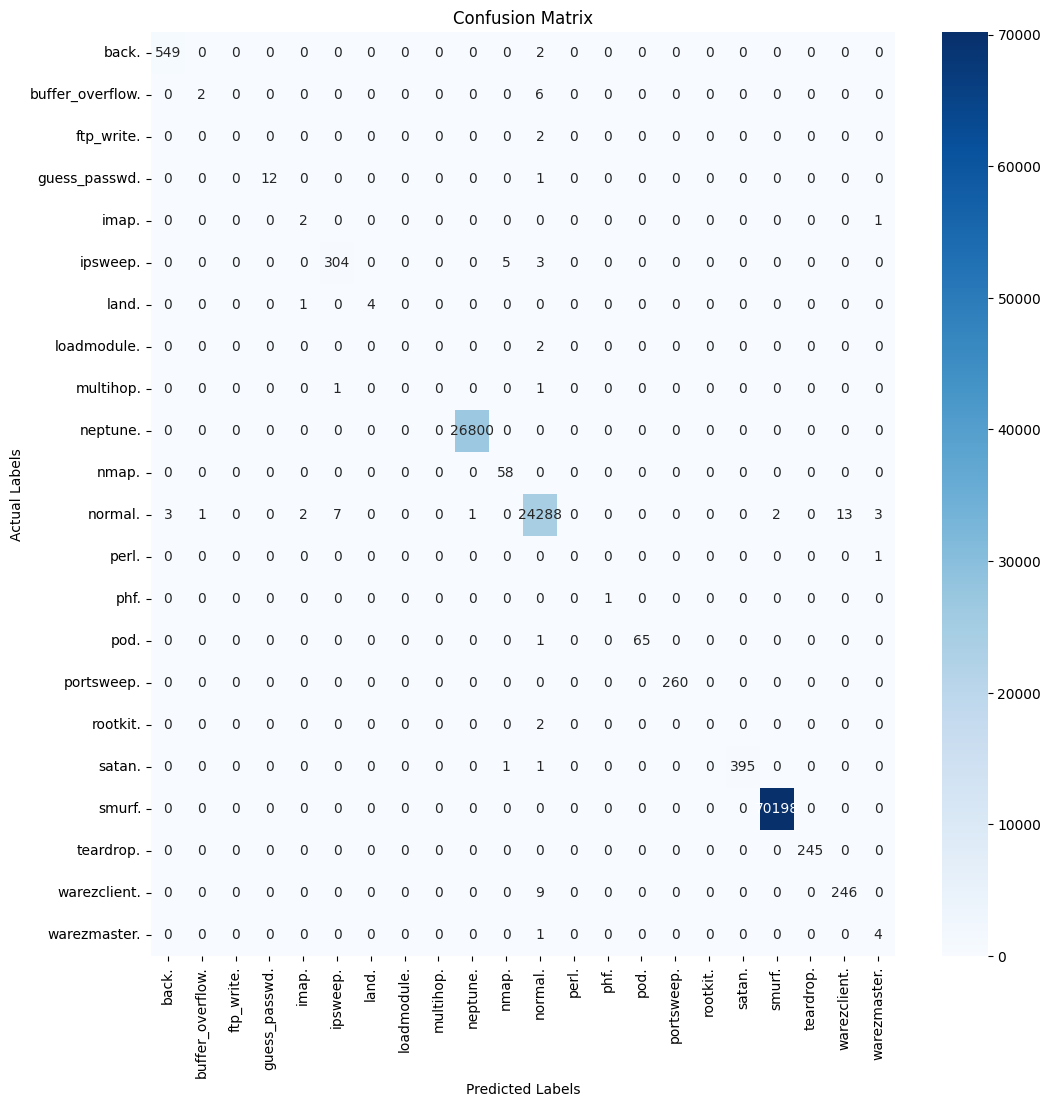

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracy = metrics.accuracy_score(true_labels, pred_labels)
print(f"Overall Accuracy Score: {accuracy:.4f}\n")

present_labels = np.unique(true_labels)
present_class_names = [outcomes[i] for i in present_labels]

print("Classification Report:")
report = metrics.classification_report(
    true_labels,
    pred_labels,
    labels=present_labels,
    target_names=present_class_names,
    zero_division=0
)
print(report)

print("\nConfusion Matrix:")
cm = metrics.confusion_matrix(true_labels, pred_labels, labels=present_labels)

plt.figure(figsize=(12, 12))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=present_class_names,
    yticklabels=present_class_names
)
plt.title("Confusion Matrix")
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()